# MTA Subway Hourly Ridership: 2020-2024

**Imports**

In [15]:
%config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Helvetica'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import folium
from folium.plugins import HeatMap
import matplotlib.colors as mcolors

**Loading data**

In [16]:
# Importing dataset in chunks to handle memory issues
filepath = r"C:/Users/clara/OneDrive - Danmarks Tekniske Universitet/Skrivebord/DTU/Human Centeret Artificial Intelligence/2. semester/02806_Social_Data_Analysis_and_Visualization/MTA_Subway_Hourly_Ridership__2020-2024_20250408.csv"

# Load the first chunk to inspect the data
chunk_size = 100000  # Adjust the chunk size as needed
chunk_iter = pd.read_csv(filepath, chunksize=chunk_size)

# Combine the first few chunks to inspect the data
df = pd.concat([chunk for _, chunk in zip(range(5), chunk_iter)], ignore_index=True)

# Display the first few rows of the combined dataset
print(df.head())

        transit_timestamp transit_mode station_complex_id  \
0  05/31/2021 05:00:00 PM       subway                250   
1  05/31/2021 09:00:00 AM       subway                318   
2  05/31/2021 09:00:00 AM       subway                385   
3  05/31/2021 08:00:00 PM       subway                198   
4  05/31/2021 09:00:00 PM       subway                  2   

                station_complex    borough payment_method  \
0                 Kings Hwy (F)   Brooklyn      metrocard   
1    34 St-Penn Station (1,2,3)  Manhattan      metrocard   
2                    176 St (4)      Bronx      metrocard   
3  Howard Beach-JFK Airport (A)     Queens      metrocard   
4            Astoria Blvd (N,W)     Queens      metrocard   

            fare_class_category  ridership  transfers   latitude  longitude  \
0          Metrocard - Students          3          0  40.603218  -73.97236   
1  Metrocard - Unlimited 30-Day         43          0  40.750374  -73.99106   
2         Metrocard - Fair Fa

### Creating plots

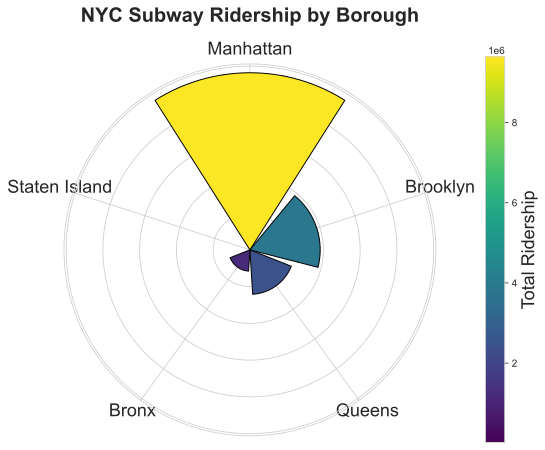

In [17]:
# Clean
df = df.dropna(subset=['borough', 'ridership'])
df = df[df['ridership'] > 0]
# Aggregate borough ridership
borough_usage = df.groupby('borough')['ridership'].sum().reset_index()
borough_usage = borough_usage.sort_values(by='ridership', ascending=False)
# Extract values
labels = borough_usage['borough'].tolist()
values = borough_usage['ridership'].values
normed_values = values / values.max()  # for colormap
# Define angles
angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False)
width = 2 * np.pi / len(values)
# Color mapping
colors = plt.cm.viridis(normed_values)

# Set the font family to a sans-serif font similar to Helvetica
plt.rcParams['font.family'] = 'sans-serif'
# Use Arial as the primary sans-serif font (widely available and similar to Helvetica)
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica Neue', 'Helvetica', 'Liberation Sans', 'sans-serif']

# Plotting
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(angles, values, width=width * 0.9, color=colors, edgecolor='black')
# Clock-style layout
ax.set_theta_offset(np.pi / 2)       # Start at top
ax.set_theta_direction(-1)           # Go clockwise
ax.set_yticklabels([])               # Hide radial labels
ax.set_xticks(angles)                # Set ticks
ax.set_xticklabels(labels, fontsize=18, fontfamily='sans-serif')
# Add color bar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=mcolors.Normalize(vmin=values.min(), vmax=values.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7, pad=0.1)
cbar.set_label('Total Ridership', fontsize=18, fontfamily='sans-serif')
cbar.ax.tick_params(labelsize=10)
# Make sure colorbar ticks also use Helvetica
for label in cbar.ax.get_yticklabels():
    label.set_fontfamily('sans-serif')

# Add title
ax.set_title('NYC Subway Ridership by Borough', 
             fontsize=20, 
             fontweight='bold', 
             pad=20,
             fontfamily='sans-serif')
# Change font properties
plt.tight_layout()
plt.show()


C:\Users\clara\AppData\Local\Temp\ipykernel_27904\2661661267.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], errors='coerce')


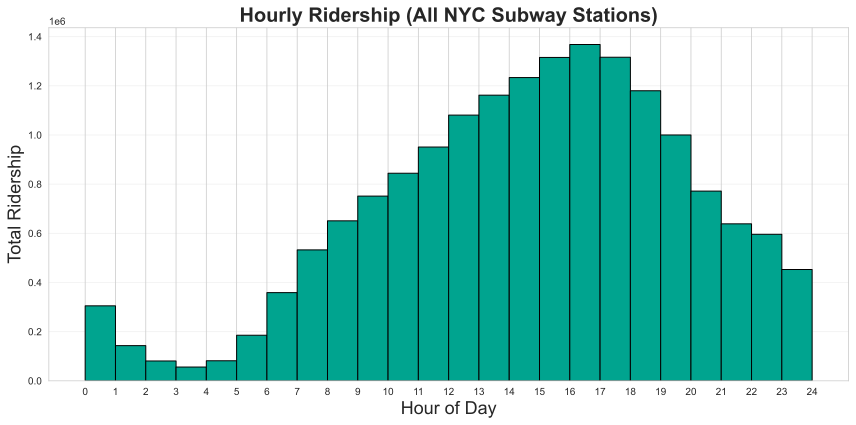

In [18]:
# Convert timestamp to datetime and extract hour
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], errors='coerce')
df = df.dropna(subset=['transit_timestamp', 'ridership'])  # drop rows with missing timestamps or ridership
df['hour'] = df['transit_timestamp'].dt.hour

# Set the font family to a sans-serif font similar to Helvetica
plt.rcParams['font.family'] = 'sans-serif'
# Use Arial as the primary sans-serif font (widely available and similar to Helvetica)
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica Neue', 'Helvetica', 'Liberation Sans', 'sans-serif']

# Plot histogram of hourly ridership
plt.figure(figsize=(12, 6))

# Compute the histogram data manually to apply custom colors
hours = df['hour']
weights = df['ridership']
bins = np.arange(0, 25, 1)

# Compute histogram
hist, bin_edges = np.histogram(hours, bins=bins, weights=weights)

# Plot the histogram with specific hex color
plt.bar(bin_edges[:-1], hist, width=1, edgecolor='black', color='#00a48f', align='edge')

# Set title and labels with explicit font family
plt.title('Hourly Ridership (All NYC Subway Stations)',
          fontsize=20,
          fontfamily='sans-serif',
          fontweight='bold')
plt.xlabel('Hour of Day', fontsize=18, fontfamily='sans-serif')
plt.ylabel('Total Ridership', fontsize=18, fontfamily='sans-serif')

# Set tick parameters with the same font
plt.xticks(range(0, 25), fontfamily='sans-serif')
plt.yticks(fontfamily='sans-serif')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\clara\AppData\Local\Temp\ipykernel_27904\3035722542.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], errors='coerce')


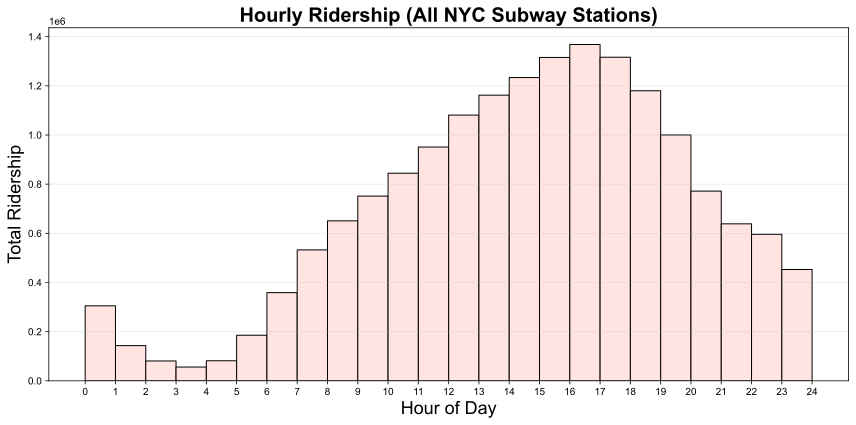

In [4]:
# Convert timestamp to datetime and extract hour
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], errors='coerce')
df = df.dropna(subset=['transit_timestamp', 'ridership'])  # drop rows with missing timestamps or ridership
df['hour'] = df['transit_timestamp'].dt.hour

# Set the font family to a sans-serif font similar to Helvetica
plt.rcParams['font.family'] = 'sans-serif'
# Use Arial as the primary sans-serif font (widely available and similar to Helvetica)
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica Neue', 'Helvetica', 'Liberation Sans', 'sans-serif']

# Plot histogram of hourly ridership
plt.figure(figsize=(12, 6))
plt.hist(
    df['hour'],
    bins=np.arange(0, 25, 1),
    weights=df['ridership'],
    color='mistyrose',
    edgecolor='black'
)

# Set title and labels with explicit font family
plt.title('Hourly Ridership (All NYC Subway Stations)', 
          fontsize=20, 
          fontfamily='sans-serif', 
          fontweight='bold')
plt.xlabel('Hour of Day', fontsize=18, fontfamily='sans-serif')
plt.ylabel('Total Ridership', fontsize=18, fontfamily='sans-serif')

# Set tick parameters with the same font
plt.xticks(range(0, 25), fontfamily='sans-serif')
plt.yticks(fontfamily='sans-serif')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

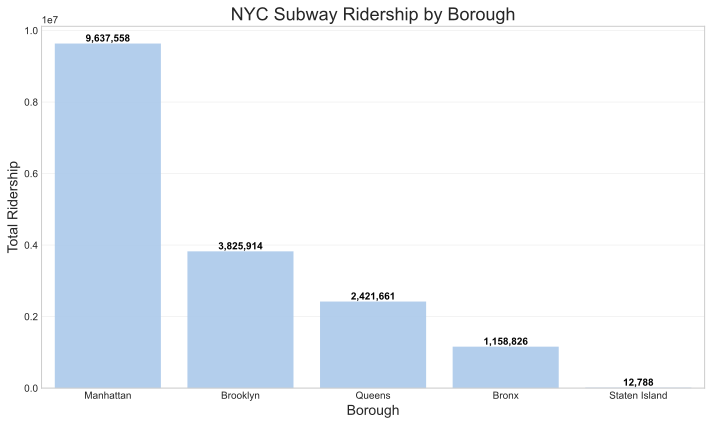

In [17]:
# Drop rows with missing borough or ridership
df = df.dropna(subset=['borough', 'ridership'])

# Aggregate total ridership per borough
borough_usage = df.groupby('borough')['ridership'].sum().reset_index()

# Sort by ridership for cleaner plotting
borough_usage = borough_usage.sort_values(by='ridership', ascending=False)

# Make sure Staten Island is included (if it's not already in the data)
if 'Staten Island' not in borough_usage['borough'].values:
    # Add Staten Island with a placeholder value if you have one
    # or remove this if-block if you're sure Staten Island is in your dataset
    borough_usage = borough_usage.append({'borough': 'Staten Island', 'ridership': 0}, ignore_index=True)
    borough_usage = borough_usage.sort_values(by='ridership', ascending=False)

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=borough_usage, x='borough', y='ridership', alpha=0.9)

# Format
plt.title('NYC Subway Ridership by Borough', fontsize=18)
plt.ylabel('Total Ridership', fontsize=14)
plt.xlabel('Borough', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add value labels directly above the borough names (at the top of the axes)
# for i, row in borough_usage.iterrows():
    # Place text at position i (x-axis) and just above 0 on y-axis
    #ax.text(i, 0, f"{int(row['ridership']):,}", 
       #     ha='center', va='bottom', fontsize=10, fontweight='bold',
        #    color='black', transform=ax.get_xaxis_transform())

# Add value labels above each bar
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2  # Midten af søjlen
    y = bar.get_height()                  # Højden = y-værdien vi skal vise
    ax.text(x, y + 300,                   # 300 som offset for lidt luft
            f"{int(y):,}", 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')


plt.tight_layout()
plt.show()

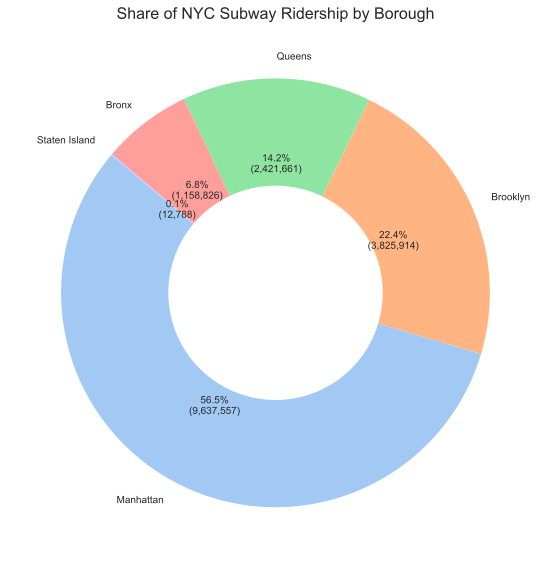

In [18]:
# Pie chart version
plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n({count:,})"  # tilføj tusindtalsseparator
    return my_autopct

plt.pie(borough_usage['ridership'], labels=borough_usage['borough'], 
        autopct=make_autopct(borough_usage['ridership']), startangle=140, colors=colors, 
        wedgeprops=dict(width=0.5))  # Makes a donut chart

plt.title('Share of NYC Subway Ridership by Borough', fontsize=16)
plt.tight_layout()
plt.show()


## Creating Heatmap

In [19]:
# Drop missing or invalid rows
df = df.dropna(subset=['latitude', 'longitude', 'ridership'])

# Optional: filter to remove weird outlier entries (e.g., zero or negative ridership)
df = df[df['ridership'] > 0]

# Aggregate ridership by station location
station_usage = df.groupby(['latitude', 'longitude']).agg(
    total_ridership=('ridership', 'sum')
).reset_index()

# Scale the ridership for display (adjust divisor if needed)
station_usage['weight'] = station_usage['total_ridership'] / 1000

# Convert to list of [lat, lon, weight]
heat_data = station_usage[['latitude', 'longitude', 'weight']].values.tolist()

# NYC coordinates
nyc_latitude = 40.7128
nyc_longitude = -74.0060

# Create a folium map centered on NYC
nyc_map = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=11)

# Add heatmap layer
HeatMap(heat_data, radius=10, blur=8, max_zoom=1).add_to(nyc_map)

# Display map in notebook (for Jupyter / Colab)
nyc_map

In [20]:
# Drop missing or invalid rows
df = df.dropna(subset=['latitude', 'longitude', 'ridership'])

# Optional: filter to remove weird outlier entries (e.g., zero or negative ridership)
df = df[df['ridership'] > 0]

# Aggregate ridership by station location
station_usage = df.groupby(['latitude', 'longitude']).agg(
    total_ridership=('ridership', 'sum')
).reset_index()

# Scale the ridership for display (adjust divisor if needed)
station_usage['weight'] = station_usage['total_ridership'] / 1000

# Convert to list of [lat, lon, weight]
heat_data = station_usage[['latitude', 'longitude', 'weight']].values.tolist()

# NYC coordinates
nyc_latitude = 40.7128
nyc_longitude = -74.0060

# Create a folium map centered on NYC
nyc_map = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=11)

for _, row in station_usage.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        popup=f"Ridership: {int(row['total_ridership'])}",
        fill=True,
        color='blue',
        fill_opacity=0.6
    ).add_to(nyc_map)

# Add heatmap layer
HeatMap(heat_data, radius=10, blur=8, max_zoom=1).add_to(nyc_map)


# Display map in notebook (for Jupyter / Colab)
nyc_map



<module 'matplotlib.pyplot' from 'c:\\Users\\clara\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

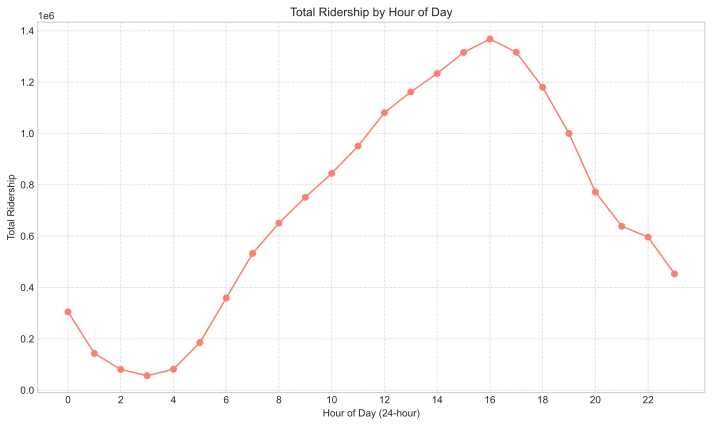

In [23]:
import folium
from folium.plugins import HeatMap
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Drop missing or invalid rows
df = df.dropna(subset=['latitude', 'longitude', 'ridership', 'transit_timestamp'])

# Optional: filter to remove weird outlier entries
df = df[df['ridership'] > 0]

# Convert transite_timestamp to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['transit_timestamp']):
    df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])

# Extract day of week (0=Monday, 6=Sunday)
df['day_of_week'] = df['transit_timestamp'].dt.dayofweek
df['day_name'] = df['transit_timestamp'].dt.day_name()
df['hour_of_day'] = df['transit_timestamp'].dt.hour

# Create a function to generate heatmap for a specific day
def create_heatmap_for_day(day_number):
    # Filter data for the specific day
    day_data = df[df['day_of_week'] == day_number]
    
    # Aggregate ridership by station location for this day
    station_usage = day_data.groupby(['latitude', 'longitude']).agg(
        total_ridership=('ridership', 'sum')
    ).reset_index()
    
    # Scale the ridership for display
    station_usage['weight'] = station_usage['total_ridership'] / 1000
    
    # Convert to list of [lat, lon, weight]
    heat_data = station_usage[['latitude', 'longitude', 'weight']].values.tolist()
    
    # NYC coordinates
    nyc_latitude = 40.7128
    nyc_longitude = -74.0060
    
    # Create a folium map centered on NYC
    day_map = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=11)
    
    # Add heatmap layer
    HeatMap(heat_data, radius=10, blur=8, max_zoom=1).add_to(day_map)
    
    day_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'][day_number]
    folium.LayerControl().add_to(day_map)
    
    # Add a title
    title_html = f'''
    <h3 align="center" style="font-size:16px"><b>Transit Ridership Heatmap - {day_name}</b></h3>
    '''
    day_map.get_root().html.add_child(folium.Element(title_html))
    
    return day_map

# Create a map with all days as separate toggle layers
def create_multi_day_heatmap():
    # NYC coordinates
    nyc_latitude = 40.7128
    nyc_longitude = -74.0060
    
    # Create base map
    multi_day_map = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=11)
    
    # Create a feature group for each day
    day_groups = []
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    for day_num in range(7):
        # Filter data for the specific day
        day_data = df[df['day_of_week'] == day_num]
        
        # Aggregate ridership by station location for this day
        station_usage = day_data.groupby(['latitude', 'longitude']).agg(
            total_ridership=('ridership', 'sum')
        ).reset_index()
        
        # Scale the ridership for display
        station_usage['weight'] = station_usage['total_ridership'] / 1000
        
        # Convert to list of [lat, lon, weight]
        heat_data = station_usage[['latitude', 'longitude', 'weight']].values.tolist()
        
        # Create a feature group for this day
        day_group = folium.FeatureGroup(name=day_names[day_num])
        
        # Add heatmap to the feature group
        HeatMap(heat_data, radius=10, blur=8, max_zoom=1).add_to(day_group)
        
        # Add the feature group to the map
        day_group.add_to(multi_day_map)
    
    # Add layer control
    folium.LayerControl().add_to(multi_day_map)
    
    # Add a title
    title_html = '''
    <h3 align="center" style="font-size:16px"><b>Transit Ridership Heatmap by Day of Week</b></h3>
    '''
    multi_day_map.get_root().html.add_child(folium.Element(title_html))
    
    return multi_day_map

# You can also analyze by hour of day
def create_hourly_heatmap(hour):
    # Filter data for the specific hour
    hour_data = df[df['hour_of_day'] == hour]
    
    # Aggregate ridership by station location for this hour
    station_usage = hour_data.groupby(['latitude', 'longitude']).agg(
        total_ridership=('ridership', 'sum')
    ).reset_index()
    
    # Scale the ridership for display
    station_usage['weight'] = station_usage['total_ridership'] / 1000
    
    # Convert to list of [lat, lon, weight]
    heat_data = station_usage[['latitude', 'longitude', 'weight']].values.tolist()
    
    # NYC coordinates
    nyc_latitude = 40.7128
    nyc_longitude = -74.0060
    
    # Create a folium map centered on NYC
    hour_map = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=11)
    
    # Add heatmap layer
    HeatMap(heat_data, radius=10, blur=8, max_zoom=1).add_to(hour_map)
    
    period = "AM" if hour < 12 else "PM"
    display_hour = hour if hour <= 12 else hour - 12
    if display_hour == 0:
        display_hour = 12
    
    # Add a title
    title_html = f'''
    <h3 align="center" style="font-size:16px"><b>Transit Ridership Heatmap - {display_hour}:00 {period}</b></h3>
    '''
    hour_map.get_root().html.add_child(folium.Element(title_html))
    
    return hour_map

# Create a map showing ridership distribution by day of week as a bar chart
def plot_ridership_by_day():
    # Aggregate ridership by day of week
    daily_ridership = df.groupby('day_name')['ridership'].sum().reindex(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    )
    
    plt.figure(figsize=(10, 6))
    daily_ridership.plot(kind='bar', color='skyblue')
    plt.title('Total Ridership by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Total Ridership')
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt

# Create a map showing ridership distribution by hour of day as a line chart
def plot_ridership_by_hour():
    # Aggregate ridership by hour of day
    hourly_ridership = df.groupby('hour_of_day')['ridership'].sum()
    
    plt.figure(figsize=(10, 6))
    hourly_ridership.plot(kind='line', marker='o', color='salmon')
    plt.title('Total Ridership by Hour of Day')
    plt.xlabel('Hour of Day (24-hour)')
    plt.ylabel('Total Ridership')
    plt.xticks(range(0, 24, 2))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    return plt

# Now you can use these functions based on your needs:

# For a specific day (e.g., Monday = 0)
monday_map = create_heatmap_for_day(0)
monday_map

# For all days in one map with toggle layers
multi_day_map = create_multi_day_heatmap()
multi_day_map

# For rush hour (e.g., 8 AM)
morning_rush_map = create_hourly_heatmap(8)
morning_rush_map

# For afternoon rush (e.g., 5 PM)
evening_rush_map = create_hourly_heatmap(17)
evening_rush_map

# Visualize overall patterns
plot_ridership_by_hour()